<a href="https://colab.research.google.com/github/marcelounb/ML-Mastery-with-Python-Course/blob/master/chap21_Binary_Classi%EF%AC%81cation_ML_Case_Study_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Deﬁnition
The focus of this project will be the Sonar Mines vs Rocks dataset1. The problem is to predict metal or rock objects from sonar return data. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The label associated with each record contains the letter R if the object is a rock and M if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

In [0]:
# Load libraries 
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv 
from pandas import set_option 
from pandas.plotting import scatter_matrix 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
# Load dataset 
filename = '/content/sonar.all-data' 
dataset = read_csv(filename, header=None)

# Understanding the dataset

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
dataset.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7032,0.7141,0.6893,0.4961,0.2584,0.0969,0.0776,0.0364,0.1572,0.1823,0.1349,0.0849,0.0492,0.1367,0.1552,0.1548,0.1319,0.0985,0.1258,0.0954,0.0489,0.0241,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,0.2720,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,0.5700,0.7397,0.8062,0.8837,0.9432,1.0000,0.9375,0.7603,0.7123,0.8358,0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,0.0847,0.2076,0.2505,0.1862,0.1439,0.1470,0.0991,0.0041,0.0154,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
dataset.shape

(208, 61)

In [6]:
# types 
set_option('display.max_rows', 500) 
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object

In [7]:
# descriptions, change precision to 3 places 
set_option('display.width',100)
set_option('precision', 3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,0.236,0.250,0.273,0.297,0.320,0.378,0.416,0.452,0.505,0.563,0.609,0.624,0.647,0.673,0.675,0.700,0.702,0.694,0.642,0.581,0.504,0.439,0.417,0.403,0.393,0.385,0.364,0.340,0.326,0.311,0.289,0.278,0.247,0.214,0.197,0.161,0.122,0.091,0.052,0.020,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,0.133,0.140,0.141,0.164,0.205,0.233,0.264,0.262,0.258,0.263,0.258,0.256,0.250,0.239,0.245,0.237,0.246,0.237,0.240,0.221,0.214,0.213,0.207,0.231,0.259,0.264,0.240,0.213,0.199,0.179,0.171,0.169,0.139,0.133,0.152,0.134,0.087,0.062,0.036,0.014,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,0.029,0.024,0.018,0.027,0.003,0.016,0.035,0.037,0.049,0.066,0.051,0.022,0.056,0.024,0.024,0.092,0.048,0.028,0.014,0.061,0.048,0.040,0.048,0.021,0.022,0.008,0.035,0.038,0.037,0.012,0.036,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,0.129,0.133,0.166,0.175,0.165,0.196,0.206,0.242,0.299,0.351,0.400,0.407,0.450,0.541,0.526,0.544,0.532,0.535,0.464,0.411,0.346,0.281,0.258,0.218,0.179,0.154,0.160,0.174,0.174,0.186,0.163,0.159,0.155,0.127,0.094,0.069,0.064,0.045,0.026,0.012,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,0.225,0.249,0.264,0.281,0.282,0.305,0.308,0.368,0.435,0.542,0.618,0.665,0.700,0.699,0.721,0.754,0.746,0.732,0.681,0.607,0.490,0.430,0.391,0.351,0.313,0.321,0.306,0.313,0.283,0.278,0.260,0.245,0.223,0.178,0.148,0.121,0.102,0.078,0.045,0.018,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,0.302,0.331,0.351,0.386,0.453,0.536,0.659,0.679,0.731,0.809,0.817,0.832,0.849,0.872,0.874,0.894,0.917,0.900,0.852,0.735,0.642,0.580,0.556,0.596,0.593,0.557,0.519,0.441,0.435,0.424,0.388,0.384,0.325,0.272,0.232,0.200,0.154,0.120,0.069,0.025,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,0.734,0.706,0.713,0.997,1.000,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.966,0.931,1.000,0.965,1.000,1.000,0.950,1.000,0.986,0.930,0.899,0.825,0.773,0.776,0.703,0.729,0.552,0.334,0.198,0.083,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [8]:
# class distribution 
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

# Visualizations

Unimodal Data Visualizations

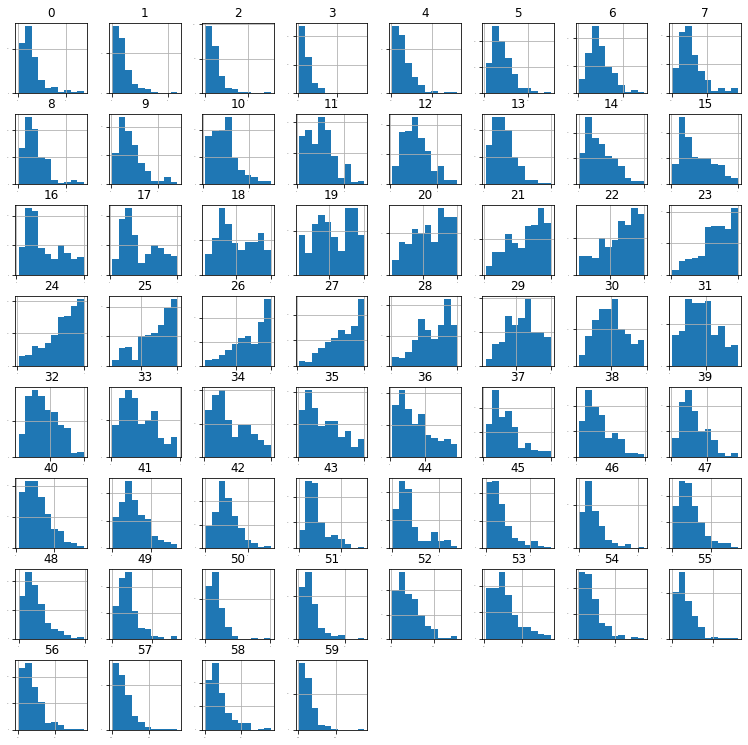

In [9]:
# histograms 
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(13,13))
plt.show()

We can see that there are a lot of Gaussian-like distributions and perhaps some exponentiallike distributions for other attribute

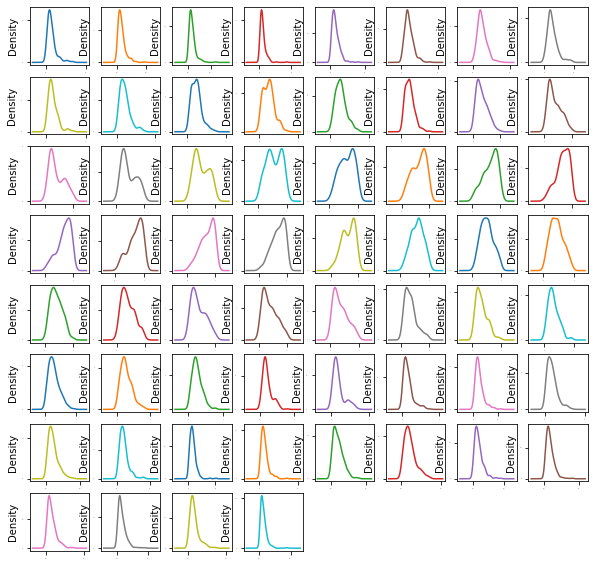

In [10]:
# Let’s take a look at the same perspective of the data using density plots.
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(10,10))
plt.show()

This is useful, you can see that many of the attributes have a skewed distribution. A power transform like a Box-Cox transform that can correct for the skew in distributions might be useful.

Multimodal Data Visualizations

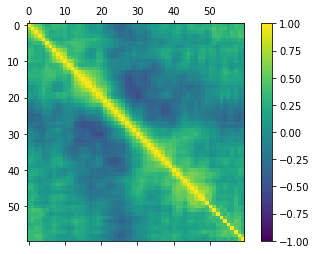

In [11]:
# correlation matrix 
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none') 
fig.colorbar(cax) 
plt.show()

# Splitting the Dataset

In [0]:
# Split-out validation dataset 
array = dataset.values 
X = array[:,0:60].astype(float) 
Y = array[:,60] 
validation_size = 0.20 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# Evaluate Algorithms: Baseline

In [0]:
# Test options and evaluation metric 
num_folds = 10 
seed = 7 
scoring = 'accuracy'

In [0]:
# Spot-Check Algorithms 
models = [] 
models.append(('LR', LogisticRegression(max_iter = 250))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

In [15]:
results = [] 
names = [] 
msg = []
for name, model in models: 
  kfold = KFold(n_splits=num_folds) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results) 
  names.append(name) 
  msg.append([name, cv_results.mean(), cv_results.std()])
msg

[['LR', 0.7650735294117647, 0.0936807702864002],
 ['LDA', 0.6915441176470589, 0.10013844763012668],
 ['KNN', 0.7584558823529411, 0.11214199572810514],
 ['CART', 0.7165441176470588, 0.11991664221998079],
 ['NB', 0.66875, 0.0867436726749274],
 ['SVM', 0.7955882352941177, 0.059240251851645304]]

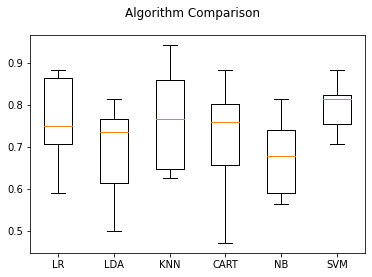

In [16]:
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

# Evaluate Algorithms: Standardize Data

In [0]:
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())]))) 
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())]))) 
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))) 
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [18]:
results = [] 
names = [] 
msg = []
for name, model in pipelines: 
  kfold = KFold(n_splits=num_folds) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
  results.append(cv_results) 
  names.append(name) 
  msg.append([name, cv_results.mean(), cv_results.std()])
msg

[['ScaledLR', 0.7779411764705882, 0.10006755935859611],
 ['ScaledLDA', 0.6915441176470589, 0.10013844763012668],
 ['ScaledKNN', 0.7768382352941176, 0.09619504790000588],
 ['ScaledCART', 0.7165441176470588, 0.08480542685391913],
 ['ScaledNB', 0.66875, 0.0867436726749274],
 ['ScaledSVM', 0.8330882352941176, 0.09717573173056245]]

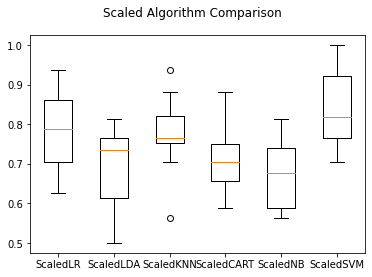

In [19]:
# Again, we should plot the distribution of the accuracy scores using box and whisker plots.
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

# Algorithm Tunning

Tuning KNN

In [20]:
# Tune scaled KNN 
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
neighbors = [1,3,5,7,9,11,13,15,17,19,21] 
param_grid = dict(n_neighbors=neighbors) 
model = KNeighborsClassifier() 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
grid_result.best_score_, grid_result.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


(0.8492647058823529, {'n_neighbors': 1})

In [21]:
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
msg = []
for mean, stdev, param in zip(means, stds, params): 
  msg.append([mean, stdev, param])
msg

[[0.8492647058823529, 0.0847344722993408, {'n_neighbors': 1}],
 [0.8007352941176471, 0.0725448793201211, {'n_neighbors': 3}],
 [0.7772058823529411, 0.08633367512279093, {'n_neighbors': 5}],
 [0.7591911764705882, 0.1147889263871183, {'n_neighbors': 7}],
 [0.7408088235294118, 0.11554007097855748, {'n_neighbors': 9}],
 [0.7283088235294117, 0.10476909133900131, {'n_neighbors': 11}],
 [0.6981617647058823, 0.10454954145115634, {'n_neighbors': 13}],
 [0.6930147058823529, 0.07586813734833536, {'n_neighbors': 15}],
 [0.711764705882353, 0.08508785913176035, {'n_neighbors': 17}],
 [0.6992647058823529, 0.08418716276073461, {'n_neighbors': 19}],
 [0.6941176470588235, 0.07230225986791089, {'n_neighbors': 21}]]

Tuning SVM

In [22]:
# Tune scaled SVM 
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0] 
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid'] 
param_grid = dict(C=c_values, kernel=kernel_values) 
model = SVC() 
kfold = KFold(n_splits=num_folds, random_state=seed) 
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
grid_result.best_score_, grid_result.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


(0.8628676470588236, {'C': 1.5, 'kernel': 'rbf'})

In [23]:
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params'] 
msg = []
for mean, stdev, param in zip(means, stds, params):
  msg.append([mean, stdev, param])
msg

[[0.7897058823529411, 0.07109575515728123, {'C': 0.1, 'kernel': 'linear'}],
 [0.5106617647058823, 0.0869460032589133, {'C': 0.1, 'kernel': 'poly'}],
 [0.5746323529411764, 0.1572829180369832, {'C': 0.1, 'kernel': 'rbf'}],
 [0.7040441176470588, 0.06007964905110384, {'C': 0.1, 'kernel': 'sigmoid'}],
 [0.7963235294117647, 0.06368258359463123, {'C': 0.3, 'kernel': 'linear'}],
 [0.6389705882352941, 0.11812632159968108, {'C': 0.3, 'kernel': 'poly'}],
 [0.7540441176470589, 0.06953196378565235, {'C': 0.3, 'kernel': 'rbf'}],
 [0.7286764705882354, 0.06262530691137523, {'C': 0.3, 'kernel': 'sigmoid'}],
 [0.742279411764706, 0.07576473585357461, {'C': 0.5, 'kernel': 'linear'}],
 [0.6926470588235294, 0.10217942950099489, {'C': 0.5, 'kernel': 'poly'}],
 [0.7720588235294118, 0.08576505386034464, {'C': 0.5, 'kernel': 'rbf'}],
 [0.7775735294117647, 0.08441884193533113, {'C': 0.5, 'kernel': 'sigmoid'}],
 [0.7058823529411764, 0.08729585676878679, {'C': 0.7, 'kernel': 'linear'}],
 [0.7830882352941175, 0.060

# Ensemble Methods

In [24]:
# ensembles 
ensembles = [] 
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier())) 
results = [] 
names = [] 
msg = []
for name, model in ensembles: 
  kfold = KFold(n_splits=num_folds) 
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
  results.append(cv_results) 
  names.append(name) 
  msg.append([name, cv_results.mean(), cv_results.std()])
msg

[['AB', 0.7952205882352941, 0.05539283467397199],
 ['GBM', 0.8069852941176471, 0.09741259612638933],
 ['RF', 0.8077205882352942, 0.07482408001323497],
 ['ET', 0.8676470588235293, 0.06883939610969436]]

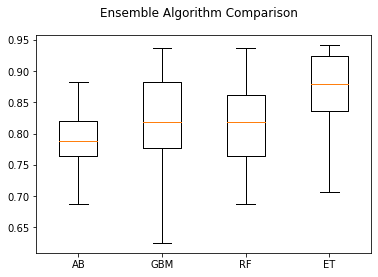

In [25]:
# Compare Algorithms 
fig = plt.figure() 
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

# Finalizing the model

In [0]:
# prepare the model 
scaler = StandardScaler().fit(X_train) 
rescaledX = scaler.transform(X_train) 
model = SVC(C=1.5) 
model.fit(rescaledX, Y_train) 
# estimate accuracy on validation dataset 
rescaledValidationX = scaler.transform(X_validation) 
predictions = model.predict(rescaledValidationX) 

In [27]:
accuracy_score(Y_validation, predictions)

0.8333333333333334

In [28]:
confusion_matrix(Y_validation, predictions)

array([[19,  7],
       [ 0, 16]])

In [29]:
classification_report(Y_validation, predictions).split('\n')

['              precision    recall  f1-score   support',
 '',
 '           M       1.00      0.73      0.84        26',
 '           R       0.70      1.00      0.82        16',
 '',
 '    accuracy                           0.83        42',
 '   macro avg       0.85      0.87      0.83        42',
 'weighted avg       0.88      0.83      0.84        42',
 '']